# Daily Challenge: Power Up Your A/B Testing for Your Online Bakery!


## Context: The Great Bake-Off

You’re the data analyst for a popular online bakery, “Sweet Bytes,” known for its delicious treats and innovative digital marketing campaigns. The bakery is about to launch a new checkout process, and the team believes it could significantly boost sales. However, before making the switch, you need to run an A/B test to ensure the new process truly outperforms the current one. To do this, you’ll need to calculate the right sample size to ensure your test is both efficient and reliable. Ready to power up your A/B testing skills and help Sweet Bytes make the right decision? Let’s dive in!

## Your Task

1. [Calculate the Required Sample Size](#calc-sample-size):

    - Imagine the current checkout process has a conversion rate of 5%, and the bakery’s team is confident the new process will boost this to 7%.

    - Use Python to calculate the required sample size per group (current vs. new checkout process) with an effect size of 0.2, a significance level of 0.05, and a desired power of 0.8.

2. [Analyze the Impact of Effect Size](#anl-impact-eff):

    - The bakery’s head chef, always aiming for perfection, wonders what would happen if the effect size were different. Calculate the required sample size for effect sizes of 0.1, 0.2, 0.3, and 0.4.

    - Explain how the sample size requirements change as the effect size changes. Why does this happen?

3. [Explain the Relationship](#3-explain-the-relationship):

    Imagine you’re explaining this to the bakery’s team in a fun, easy-to-understand way. Why is it so important to balance effect size and sample size when planning an A/B test? Help them understand how this ensures they’re not wasting time or resources and how it helps them confidently make decisions that could increase their sweet sales.

---

<a id="calc-sample-size"></a>
## 1. Calculate the Required Sample Size

In [3]:
import numpy as np
from statsmodels.stats.power import tt_ind_solve_power
import matplotlib.pyplot as plt

In [12]:
# set parameters
effect_size = 0.2
alpha = 0.05
power = 0.8

# calculate sample size
sample_size = tt_ind_solve_power(
                                effect_size=effect_size, 
                                alpha=alpha, power=power, 
                                ratio=1.0, 
                                alternative='two-sided'
                                )

# round up to the nearest whole number
sample_size = int(np.ceil(sample_size))

print(f"## Required sample size per group: {sample_size}")
print(f"## Therefore we need a big total sample size of {2 * sample_size}")

## Required sample size per group: 394
## Therefore we need a big total sample size of 788


<a id="anl-impact-eff"></a>
## 2. Analyze the Impact of Effect Size:

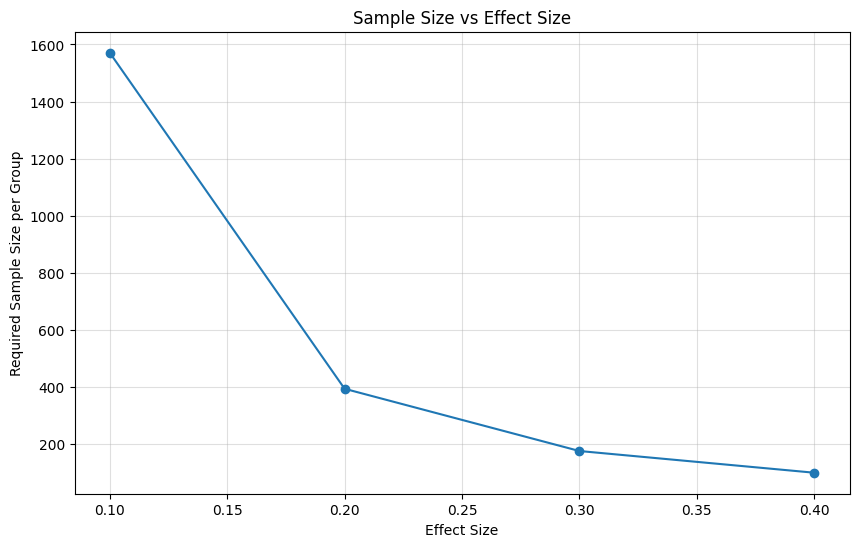

## Effect size: 0.1 --> 	required sample size per group: 1571
## Effect size: 0.2 --> 	required sample size per group: 394
## Effect size: 0.3 --> 	required sample size per group: 176
## Effect size: 0.4 --> 	required sample size per group: 100


In [9]:
# set parameters
effect_sizes = np.round(np.linspace(.1, .4, 4), decimals=1)
alpha = 0.05
power = 0.8

# calculate sample sizes for different effect sizes
sample_sizes = []
for effect_size in effect_sizes:
    size = tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')
    sample_sizes.append(int(np.ceil(size)))

# release the kraken
plt.figure(figsize=(10, 6))
plt.plot(effect_sizes, sample_sizes, marker='o')
plt.title('Sample Size vs Effect Size')
plt.xlabel('Effect Size')
plt.ylabel('Required Sample Size per Group')
plt.grid(True, alpha=.4)
plt.show()

# print results
for effect_size, sample_size in zip(effect_sizes, sample_sizes):
    print(f"## Effect size: {effect_size} --> \trequired sample size per group: {sample_size}")

Analysis of the impact of effect size on sample size requirements:

1. Inverse relationship: As the effect size increases, the required sample size decreases. This is clearly visible in the results, where the sample size drops significantly from 1571 (for effect size 0.1) to 100 (for effect size 0.4).

2. Non-linear relationship: The relationship between effect size and sample size is not linear. The decrease in sample size is more dramatic for smaller effect sizes and becomes less pronounced for larger effect sizes.

3. Sensitivity at small effect sizes: For small effect sizes (e.g., 0.1), the required sample size is much larger. This indicates that detecting small differences between groups requires a much larger sample to achieve the same statistical power.

Why this happens:

1. Statistical power: The effect size is directly related to the statistical power of the test. Larger effect sizes are easier to detect, requiring fewer samples to achieve the same level of power.
2. Signal-to-noise ratio: Effect size can be thought of as the signal-to-noise ratio. Larger effect sizes represent a stronger signal, which is easier to distinguish from random noise, thus requiring fewer samples.
3. Precision requirements: Smaller effect sizes require more precision to detect, which necessitates larger samples to reduce the impact of random variations.
4. Confidence in results: Larger samples are needed for smaller effect sizes to ensure that the observed difference is not due to chance, maintaining the desired confidence level (1 - alpha) and power.

In the context of Sweet Bytes' A/B test:

- If the new checkout process is expected to have a large impact (higher effect size), fewer samples are needed to detect the difference confidently.
- If the expected improvement is small (lower effect size), more samples are required to reliably detect the difference and avoid false negatives.


<a id="exp-relat"></a>
## 3. Explain the Relationship

### The Great Cupcake Taste Test Analogy 📊🧁

Imagine you're trying to decide between two new cupcake recipes: Classic Vanilla and Vanilla Delight. You want to know which one customers prefer, but you can't ask every single customer in the world. So, how many people do you need to ask to be confident in your decision?

- Why Sample Size and Effect Size Matter

    Think of A/B testing like perfecting a recipe 🍰:

    - Small difference (tiny effect size) = Need LOTS of taste testers
    - Big difference (large effect size) = Need FEWER taste testers

- Key Insights for Sweet Bytes

    1. **Efficiency**: Don't waste time/resources testing unnecessarily
    2. **Confidence**: Ensure results are statistically meaningful
    3. **Smart Decisions**: Make data-driven choices about checkout process

- Real-World Translation

    - Small checkout improvement? More customers needed to validate
    - Massive checkout improvement? Fewer customers needed to confirm